*** No CODEPAGE record, no encoding_override: will use 'ascii'


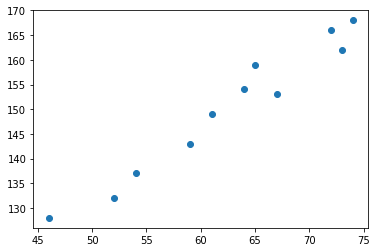

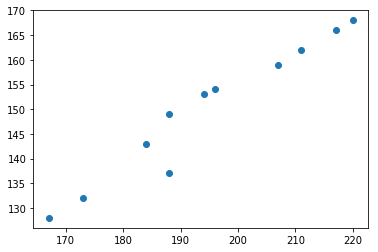

R2 Age:  0.9578407208147356
R2 Weight:  0.9419952085293065
R2 Both:  0.9836786169200672


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Treating blood pressure as thing we want to predict
# The whole point is to try taking data about age, wieght and BP, and making a model to predict BP from
# W  and Age
lst = []
for x in range(11):
    lst.append(random.randint(0,100))

df = pd.read_excel('mlr02.xls')
X = df.as_matrix()

# Systolic BP vs Age
plt.scatter(X[:,1], X[:,0])
plt.show()

#Systolic BP vs Wieght
plt.scatter(X[:,2], X[:,0])
plt.show()


df['ones'] = 1
df['X4'] = lst
Y = df['X1']
X = df[['X2', 'X3', 'X4', 'ones']]
#Age
X2only = df[['X2', 'ones']]
#Weight
X3only = df[['X3', 'ones']]

# R2 is the metric to see how well the line fits
def get_r2(X, Y):
    w = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
    Yhat = X.dot(w)
    
    d1 = Y - Yhat
    d2 = Y - Y.mean()
    r2 = 1 - d1.dot(d1)/d2.dot(d2)
    return r2


print("R2 Age: ", get_r2(X2only, Y))
print("R2 Weight: ", get_r2(X3only, Y))
print("R2 Both: ", get_r2(X, Y))